In [1]:
from KeRLas import Brain, Trainer, GymPlayer
from KeRLas.models import DirectDiffModel, defaultQModel
from env_gym import Env
from KeRLas.policies import BoltzmannQPolicy
import numpy as np

observation_width = 2
nactions = 4


Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [13]:
env = Env(tlimit=10)
rlmodel = DirectDiffModel(defaultQModel(observation_width, nactions), 0.99)
policy = BoltzmannQPolicy(0.0001)
brain = Brain(rlmodel, policy, training_policies=map(BoltzmannQPolicy, [1.0, 0.01, 0.001]))
trainer = Trainer(env, brain, 0.5, 10000)
player = GymPlayer(env, brain)

In [14]:
player.runEpisode()

[(array([0.2185, 0.1267]), 3, array([0.2185, 0.0267]), -0.01, False),
 (array([0.2185, 0.0267]), 3, array([ 0.2185, -0.0733]), -0.01, True)]

In [15]:
for _ in xrange(20):
    print trainer.train(20, 1000, 10)

0.0022354308
0.0408756
0.016862167
0.044594478
0.01642745
0.0038998395
0.01935161
0.021890966
0.018367164
0.007918609
0.01038284
0.0026682909
0.013229745
0.0036977206
0.0034204803
0.0048010615
0.004304754
0.0058364724
0.0018937454
0.004657426


In [16]:
def sample(nx, ny, model):
    x = np.arange(0.0, 1.0, 1.0/nx)
    y = np.arange(0.0, 1.0, 1.0/ny)
    xg, yg = np.meshgrid(x, y)
    
    xy = np.array((xg.reshape((-1,)),yg.reshape((-1,)))).T
    #print "s:",s.shape,s
    q = model.predict_on_batch(xy)
    w = q.shape[-1]
    #q = q - np.min(q, axis=-1, keepdims=True)
    return xg, yg, q.reshape((nx, ny, w))


(30, 30, 4)


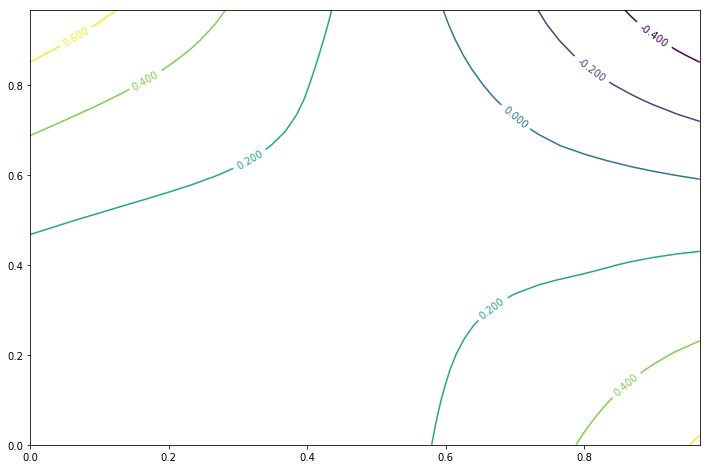

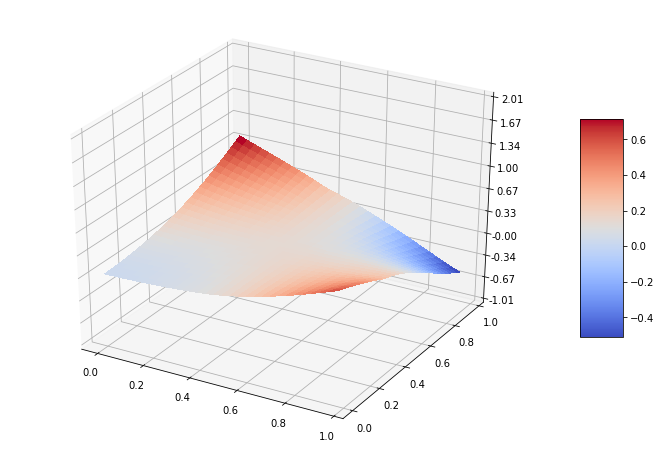

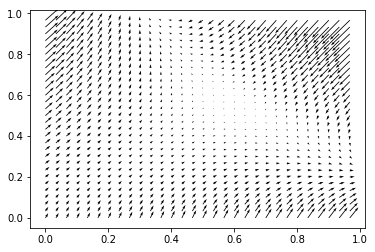

In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

def plot_quiver(model):
    x,y,q = sample(30,30,model)
    
    basis = np.array(
        [
            [1.0, 0.0],
            [0.0, 1.0],
            [-1.0, 0.0],
            [0.0, -1.0]
        ]
    )

    print q.shape
    
    vec = np.dot(q, basis)
    #print vec
    u = vec[...,0]
    v = vec[...,1]
    
    fig, ax = plt.subplots()
    surf = ax.quiver(x, y, u, v)
    #ax.clabel(surf, inline=1, fontsize=15)
    
def plot_contour(model):
    x,y,q = sample(30,30,model)
    
    plt.figure(figsize=(12,8))
    
    qmax = np.max(q, axis=-1)
    
    #ax = plt.subplot(122)
    CS = plt.contour(x, y, qmax)
    plt.clabel(CS, inline=1, fontsize=10)
    
    
def plot_surface(model):
    x,y,q = sample(30,30,model)
    
    #print q
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.gca(projection='3d')
    
    qmax = np.max(q, axis=-1)
    
    #ax = plt.subplot(122)
    surf = ax.plot_surface(x, y, qmax, cmap=cm.coolwarm,
                           linewidth=0.01, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-1.01, 2.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)    
    
    
plot_contour(rlmodel)
plot_surface(rlmodel)
plot_quiver(rlmodel)
